In [4]:
# Upload kaggle.json
from google.colab import files
files.upload()  # Upload kaggle.json

# Setup Kaggle API
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download dataset
!kaggle datasets download -d salader/dogs-vs-cats
!unzip -q dogs-vs-cats.zip -d cats_vs_dogs


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 98% 1.04G/1.06G [00:06<00:00, 106MB/s] 
100% 1.06G/1.06G [00:06<00:00, 186MB/s]


In [14]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D,BatchNormalization,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
#genrator =devide data into batches
train_ds = keras.utils.image_dataset_from_directory(
    directory='cats_vs_dogs/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory='cats_vs_dogs/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)

#store data ko numpy formate(0,255)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
#normalize
def process(image, label):
    image = tf.cast(image/255. ,tf.float32)
    return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [15]:
#create cnn model
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())


#pooling layer
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,425 (56.64 MB)

 Trainable params: 14,847,361 (56.64 MB)

 Non-trainable params: 64 (256.00 B)

In [17]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [18]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 76ms/step - accuracy: 0.5276 - loss: 0.8548 - val_accuracy: 0.5996 - val_loss: 0.6660
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 77ms/step - accuracy: 0.6239 - loss: 0.6501 - val_accuracy: 0.5806 - val_loss: 0.6914
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 77ms/step - accuracy: 0.6826 - loss: 0.5962 - val_accuracy: 0.6660 - val_loss: 0.6080
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 78ms/step - accuracy: 0.7219 - loss: 0.5390 - val_accuracy: 0.6706 - val_loss: 0.6281
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 78ms/step - accuracy: 0.7982 - loss: 0.4400 - val_accuracy: 0.6632 - val_loss: 0.6916
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 79ms/step - accuracy: 0.8727 - loss: 0.3049 - val_accuracy: 0.6652 - val_loss: 0.9093
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 77s 71ms/step - accuracy: 0.9307 - loss: 0.1863 - val_accuracy: 0.6584 - val_loss: 0.9683
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 71ms/step - accuracy: 0.9566 - loss: 0.1227 - 

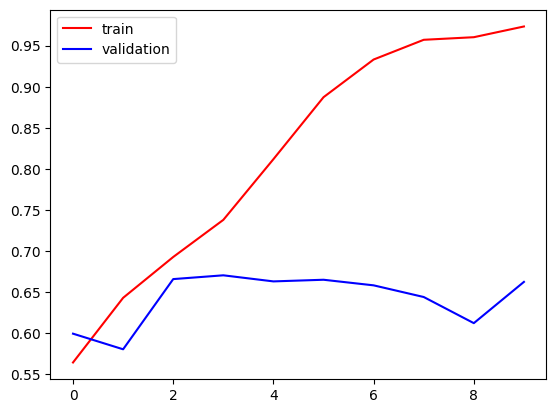

In [19]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

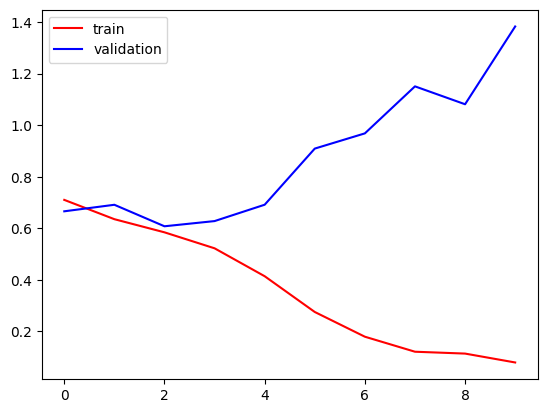

In [20]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [21]:
import cv2

In [23]:
from google.colab import files
files.upload()

Saving cat.jpeg to cat.jpeg


{'cat.jpeg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\t\x06\x07\x08\x07\x06\t\x08\x07\x08\n\n\t\x0b\r\x16\x0f\r\x0c\x0c\r\x1b\x14\x15\x10\x16 \x1d"" \x1d\x1f\x1f$(4,$&1\'\x1f\x1f-=-157:::#+?D?8C49:7\x01\n\n\n\r\x0c\r\x1a\x0f\x0f\x1a7%\x1f%77777777777777777777777777777777777777777777777777\xff\xc0\x00\x11\x08\x00\x94\x00\x94\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1c\x00\x00\x02\x02\x03\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x05\x06\x00\x04\x02\x03\x07\x01\x08\xff\xc4\x008\x10\x00\x02\x01\x03\x03\x02\x05\x02\x04\x03\x08\x03\x01\x00\x00\x00\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13"Qa\x14q2\x81\x91\xa1#B\xf0\x07$3R\xb1\xc1\xe1\xf1\x15r\xd1S\xff\xc4\x00\x19\x01\x00\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x00\x04\x05\xff\xc4\x00 \x11\x00\x02\x02\x02\x03\x00\x03\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x11\x03!\x121A\x13"qQ\xff\xda\x00\x0c\x03\x01\x00\x02\x11\x03\x11\x00?\x00\x07\xa5

In [24]:
test_img = cv2.imread('/content/cat.jpeg')


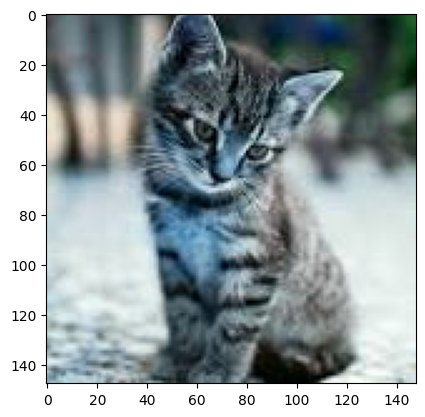

In [25]:
plt.imshow(test_img)

In [26]:
test_img.shape

(148, 148, 3)

In [27]:
test_img = cv2.resize(test_img,(256,256))

In [28]:
test_input = test_img.reshape((1,256,256,3))

In [29]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 948ms/step


array([[2.7418495e-15]], dtype=float32)

In [ ]:
# Create ImageDataGenerator instances
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(rescale=1./255)

# Create data generators
train_generator = train_datagen.flow_from_directory(
    'cats_vs_dogs/train',
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    'cats_vs_dogs/test',
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary'
)